In [58]:
import numpy as np
import readfcs
import sys

sys.path.append("..")
from src.flowsom import (
    FlowSOM,
    FlowSOM_HCCParameters,
    FlowSOM_MSTParameters,
    FlowSOM_SOMParameters,
)

from memory_profiler import memory_usage

In [59]:
filepath = "../resources/Levine_32dim.fcs"

data = readfcs.ReadFCS(filepath).data
data = data.drop("label", axis=1)

In [60]:
data[:5]

,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,...,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,individual
0,2693.0,22.0,4.391057,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,0.363602,...,-0.002936,0.053050,0.853505,1.664480,-0.005376,-0.001961,0.648429,3.627711,307.0,1.0
1,3736.0,35.0,4.340481,4.816692,0.701348,-0.038280,-0.016654,0.074409,0.808031,-0.035424,...,1.258437,0.089660,0.197818,0.491592,0.144814,0.868014,0.561384,3.627711,545.0,1.0
2,7015.0,32.0,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.042977,-0.001881,-0.008781,...,0.257137,0.046222,2.586670,1.308337,-0.010961,-0.010413,0.643337,3.627711,1726.0,1.0
3,7099.0,29.0,4.255805,4.830048,0.433747,-0.027611,-0.017661,-0.044072,0.733698,-0.019066,...,-0.041140,0.066470,1.338669,0.140523,-0.013449,-0.026039,-0.026523,3.627711,1766.0,1.0
4,7700.0,25.0,3.976909,4.506433,-0.008809,-0.030297,0.080423,0.495791,1.107627,0.552746,...,0.168609,-0.006223,0.180924,0.197332,0.076167,-0.040488,0.283287,3.627711,2031.0,1.0


In [61]:
data[-5:]

,Time,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,...,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,file_number,event_number,individual
265622,707951.4375,41.0,6.826629,7.133022,1.474081,-0.019174,-0.055620,-0.007261,0.063395,0.145304,...,0.861068,-0.011105,0.533736,0.123758,-0.042495,-0.027971,0.236957,3.669327,102686.0,2.0
265623,708145.4375,45.0,6.787791,7.154027,0.116755,-0.056213,-0.008864,-0.035158,-0.041845,0.970120,...,0.565170,0.143869,1.269464,0.047215,-0.008000,-0.025811,-0.003500,3.669327,102690.0,2.0
265624,708398.4375,41.0,6.889866,7.141219,0.684921,-0.006264,-0.026111,-0.030837,-0.034641,1.597189,...,-0.008680,0.087102,-0.055912,0.501536,0.053884,-0.042602,0.107206,3.669327,102701.0,2.0
265625,708585.4375,39.0,6.865218,7.144353,0.288761,-0.011310,-0.048786,0.073983,-0.031787,0.078800,...,-0.029347,-0.047971,0.101955,6.200001,0.296877,0.192786,0.620872,3.669327,102706.0,2.0
265626,709122.4375,41.0,6.887820,7.127359,0.360753,0.128604,-0.006934,0.109846,3.864712,0.792307,...,-0.023831,0.080195,0.037962,3.675123,-0.000878,-0.052526,0.310466,3.669327,102720.0,2.0


In [70]:
cell_counts = [10, 100, 1000, 10000, 100000, 1000000]
som_param = FlowSOM_SOMParameters(n_epochs=8)
hcc_param = FlowSOM_HCCParameters(n_clusters=24)

ts_passed = []
mems_used = []

for n_cells in cell_counts:   
    flowsom = FlowSOM(som_param=som_param, hcc_param=hcc_param)
    t_start = time.perf_counter_ns()
    start_mem = memory_usage(max_usage=True)
    flowsom.fit(data[:n_cells])
    ts_passed.append(time.perf_counter_ns() - t_start)
    mems_used.append(memory_usage(max_usage=True) - start_mem)

ts_passed = np.array(ts_passed)
mems_used = np.array(mems_used)
ts_passed, mems_used

/home/eliasnijs/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/eliasnijs/.local/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/eliasnijs/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/eliasnijs/.local/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/eliasnijs/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/eliasnijs/.local/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/e

(array([  120776575,   148068189,   478786015,  3926617757, 37847304373,
        99561075810]),
 array([ 0.        ,  0.        ,  0.        ,  0.89453125,  0.25      ,
        31.859375  ]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


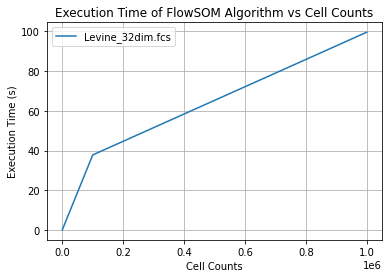

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


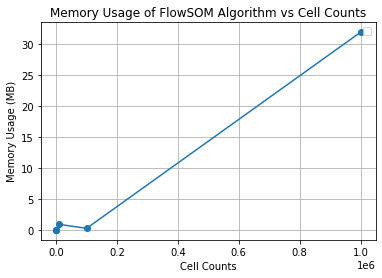

In [76]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(cell_counts, ts_passed/1e9, label="Levine_32dim.fcs")
plt.xlabel('Cell Counts')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of FlowSOM Algorithm vs Cell Counts')
plt.legend()
plt.grid(True)
plt.savefig("../reporting/report/images/time.eps")
plt.show()

plt.clf()
plt.plot(cell_counts, mems_used, marker='o', linestyle='-')
plt.xlabel('Cell Counts')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage of FlowSOM Algorithm vs Cell Counts')
plt.legend()
plt.grid(True)
plt.savefig("../reporting/report/images/mem.eps")
plt.show()